# Neural & Behavioral Modeling - Week 12 (Exercises)
by 楊士寬 (r06521535@ntu.edu.tw)

In [ ]:
# Upgrade PyTorch to 0.4.0 if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

In [2]:
# Check GPU status:
import torch as t
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    device = t.device("cpu")
    print('No GPU')

PyTorch version: 0.4.0
No GPU


## 1 Fair Performance Evaluation (5 points)
We often compare and assess performances of different model architectures/parameters/hyperparameters. Note that the results are differnt even if you re-run exactly the same code block. This is primarily due to a non-fixed random number seed. Please:

(1) run the section 1.2 TEN times and report (a) min, (b) max, (c) mean, & (d) standard deviation of the TESTING accuracies. (3 points)

(2) try to fix the random number seeds in numpy & pytorch to see if you can obtain the same results every time in the section 1.2. (2 points)

### 1.0 CIFAR-10 dataset

In [5]:
# Load the dataset:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
train_set = CIFAR10(root='.', train=True, transform=transforms.ToTensor())
train_data = t.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = CIFAR10(root='.', train=False, transform=transforms.ToTensor())
test_data = t.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 1.1 The model

In [6]:
# Make the model:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # = nn.Module.__init__(self)
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x): # functional expressions
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x
lenet = Net()
lenet = lenet.to(device)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(lenet.parameters())

### 1.2 Training & Testing

In [12]:
# Training:

for e in range(2):
    for i, (X_train, Y_train) in enumerate(train_data, 0):
        X_train,Y_train=X_train.to(device),Y_train.to(device)
        Y_pred = lenet(X_train)
        loss = loss_fn(Y_pred, Y_train)
        lenet.zero_grad()
        loss.backward()
        optimizer.step()   
        Y_pred = lenet(X_train)
        Y_pred = t.max(Y_pred,1)[1]
    print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])
    
# Testing on a batch:
dataiter = iter(test_data)
X_test, Y_test = dataiter.next() # returning a batch
X_test,Y_test=X_test.to(device),Y_test.to(device)
with t.no_grad():
    Y_pred = lenet(X_test)
    Y_pred = t.max(Y_pred,1)[1]
    print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

epoch  0 : 0.4375
epoch  1 : 0.6875
test : 0.616


### 1.3 Your answers

In [25]:
test_result = [] 
for e in range(2):
    for i, (X_train, Y_train) in enumerate(train_data, 0):
        X_train,Y_train=X_train.to(device),Y_train.to(device)
        Y_pred = lenet(X_train)
        loss = loss_fn(Y_pred, Y_train)
        lenet.zero_grad()
        loss.backward()
        optimizer.step()   
        Y_pred = lenet(X_train)
        Y_pred = t.max(Y_pred,1)[1]
    print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])

# Testing on a batch:
dataiter = iter(test_data)
X_test, Y_test = dataiter.next() # returning a batch
X_test,Y_test=X_test.to(device),Y_test.to(device)
with t.no_grad():
    Y_pred = lenet(X_test)
    Y_pred = t.max(Y_pred,1)[1]
    print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

test_result.append((Y_pred==Y_test).sum().item()/Y_test.shape[0])

KeyboardInterrupt: 

#### (1) (a) min, (b) max, (c) mean, & (d) standard deviation

In [28]:
test_result = [0.532, 0.571, 0.635, 0.635, 0.698, 0.7, 0.651, 0.727, 0.735, 0.742]
print ("(a) min :" , min(test_result))
print ("(b) max :" , max(test_result))
print ("(c) mean :", np.mean(test_result))
print ("(d) standard deviation :",np.std(test_result))

(a) min : 0.532
(b) max : 0.742
(c) mean : 0.6626000000000001
(d) standard deviation : 0.06741691182485296


#### (2) fix the random number seeds

In [21]:
seed = 42
np.random.seed(seed)
t.manual_seed(seed)

In [29]:
for e in range(2):
    for i, (X_train, Y_train) in enumerate(train_data, 0):
        X_train,Y_train=X_train.to(device),Y_train.to(device)
        Y_pred = lenet(X_train)
        loss = loss_fn(Y_pred, Y_train)
        lenet.zero_grad()
        loss.backward()
        optimizer.step()   
        Y_pred = lenet(X_train)
        Y_pred = t.max(Y_pred,1)[1]
    print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])
    
# Testing on a batch:
dataiter = iter(test_data)
X_test, Y_test = dataiter.next() # returning a batch
X_test,Y_test=X_test.to(device),Y_test.to(device)
with t.no_grad():
    Y_pred = lenet(X_test)
    Y_pred = t.max(Y_pred,1)[1]
    print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

KeyboardInterrupt: 

## 2 Universal Approximation Theorem (5 points)

Please FAIRLY evaluate whether a deep network learns XOR more efficiently than a shallow network with the same number of model parameters. Please discuss why in either case.

### 2.0 XOR data

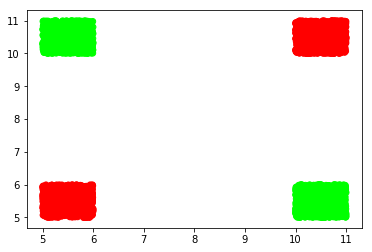

In [11]:
N=1000 # samples per cluster
XY=t.tensor([[5,5],[5,10],[10,5],[10,10]],dtype=t.float32) # 4 cluster centers
Z=t.tensor([0,1,1,0]) # category labels
t.cat([t.randn(2,1)+XY[0,0],t.randn(2,1)+XY[0,1]],1)
xy,z=t.zeros(4*N,2),t.zeros(4*N,dtype=t.int64)
for i in range(4):
    xy[i*N:(i+1)*N,]=t.rand(N,2)+XY[i,]
    z[i*N:(i+1)*N]=Z[i]
xy_np=xy.numpy()
z_np=z.numpy().astype(int)
cmap=np.array([[1,0,0],[0,1,0]])
scatter(xy_np[:,0],xy_np[:,1],color=cmap[z_np]);

#### 2.1 A shallow net with one hidden layer

In [17]:
# Number of free parameters: 2*H+H*2=70

H=35 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

for i in range(100):
    z_pred = model(xy)
    loss = loss_fn(z_pred,z)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    z_pred = model(xy) 
    z_pred = t.max(z_pred,1)[1]
    print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])

epoch  0 : 0.515
epoch  1 : 0.542
epoch  2 : 0.63275
epoch  3 : 0.75
epoch  4 : 0.75
epoch  5 : 0.75
epoch  6 : 0.75
epoch  7 : 0.75
epoch  8 : 0.75
epoch  9 : 0.75
epoch  10 : 0.75
epoch  11 : 0.75
epoch  12 : 0.75
epoch  13 : 0.75
epoch  14 : 0.75
epoch  15 : 0.75
epoch  16 : 0.75
epoch  17 : 0.75
epoch  18 : 0.75
epoch  19 : 0.75
epoch  20 : 0.75
epoch  21 : 0.75
epoch  22 : 0.76975
epoch  23 : 0.8205
epoch  24 : 0.869
epoch  25 : 0.89925
epoch  26 : 0.91975
epoch  27 : 0.9405
epoch  28 : 0.95725
epoch  29 : 0.9715
epoch  30 : 0.9825
epoch  31 : 0.99025
epoch  32 : 0.99525
epoch  33 : 0.99875
epoch  34 : 1.0
epoch  35 : 1.0
epoch  36 : 1.0
epoch  37 : 1.0
epoch  38 : 1.0
epoch  39 : 1.0
epoch  40 : 1.0
epoch  41 : 1.0
epoch  42 : 1.0
epoch  43 : 1.0
epoch  44 : 1.0
epoch  45 : 1.0
epoch  46 : 1.0
epoch  47 : 1.0
epoch  48 : 1.0
epoch  49 : 1.0
epoch  50 : 1.0
epoch  51 : 1.0
epoch  52 : 1.0
epoch  53 : 1.0
epoch  54 : 1.0
epoch  55 : 1.0
epoch  56 : 1.0
epoch  57 : 1.0
epoch  58 : 1

#### 2.2 A "deep" net with three hidden layers

In [19]:
# Number of free parameters: 2*H+H*H+H*H+H*2=70

H=5 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H,bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

for i in range(100):
    z_pred = model(xy)
    loss = loss_fn(z_pred,z)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    z_pred = model(xy) 
    z_pred = t.max(z_pred,1)[1]
    print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])

epoch  0 : 0.0955
epoch  1 : 0.175
epoch  2 : 0.33825
epoch  3 : 0.40275
epoch  4 : 0.4235
epoch  5 : 0.43975
epoch  6 : 0.45225
epoch  7 : 0.46675
epoch  8 : 0.485
epoch  9 : 0.499
epoch  10 : 0.51625
epoch  11 : 0.53425
epoch  12 : 0.55375
epoch  13 : 0.5725
epoch  14 : 0.58775
epoch  15 : 0.60525
epoch  16 : 0.622
epoch  17 : 0.6425
epoch  18 : 0.66
epoch  19 : 0.68
epoch  20 : 0.701
epoch  21 : 0.72025
epoch  22 : 0.7345
epoch  23 : 0.74175
epoch  24 : 0.749
epoch  25 : 0.75
epoch  26 : 0.75
epoch  27 : 0.75
epoch  28 : 0.75
epoch  29 : 0.75
epoch  30 : 0.75
epoch  31 : 0.75
epoch  32 : 0.75
epoch  33 : 0.75
epoch  34 : 0.75
epoch  35 : 0.75
epoch  36 : 0.75
epoch  37 : 0.75
epoch  38 : 0.75
epoch  39 : 0.75
epoch  40 : 0.75
epoch  41 : 0.75
epoch  42 : 0.75
epoch  43 : 0.75
epoch  44 : 0.75
epoch  45 : 0.75
epoch  46 : 0.75
epoch  47 : 0.75
epoch  48 : 0.75
epoch  49 : 0.75
epoch  50 : 0.75
epoch  51 : 0.75
epoch  52 : 0.75
epoch  53 : 0.7505
epoch  54 : 0.7515
epoch  55 : 0.753
e

### 2.3 Your answers

因為多層次會把問題先簡化過濾後在處理，再進去下一層，每一層都被訓練來達成某一個小目標，將一個複雜的問題分段解決，單層一次就想解決比較複雜的問題，效率會比較差，我想這是這是"deep net work"比較有效率的原因。